<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 3: Practical - ML Models for Tabular Datasets <br>
<font color=696880 size=4>
    Niloufar Razani 
    
    
____

### Full Name : Mohammad Parham Bateni
### Student Number : 99105294
___

<font face="Times New Roman" size=4><div dir=ltr>
In this homework we are going to implement Adaboost algorithm from scratch. Please read this chapter's <a href="https://github.com/asharifiz/Introduction_to_Machine_Learning/tree/main/Jupyter_Notebooks/Chapter_04_Tabular_Data_Models"><font face="Roboto">notebook</font></a> and then complete the #TODO sections. <br>
We will use the heart_disease.csv dataset, which you can see more details about in this <a href="https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download&select=heart.csv"><font face="Roboto">Link</font></a>.
___

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Prepration (10 points) 
1.   Load Dataset
2.   Separate target feaure
3.   Change class labels to 1 and -1
4.   Do train-test split

In [3]:
df=pd.read_csv('heart_disease.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
X,y=df[df.columns[:-1]],pd.DataFrame({'target':df['target']})
y.replace(0,-1,inplace=True)
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)
X_train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
14,52,1,0,128,204,1,1,156,1,1.0,1,0,0
400,49,1,2,120,188,0,1,139,0,2.0,1,3,3
273,54,1,0,110,206,0,0,108,1,0.0,1,1,2
646,47,1,2,108,243,0,1,152,0,0.0,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2


### Adaboost Algorithm Implementation (40 points)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from math import log
from math import e
def calculate_error(y, y_pred, w):
    #TODO : Calculate the weighted error of a weak classifier.
    return np.dot(w,y!=y_pred)
    

def calculate_alpha(error):
    #TODO : Calculate the weight of a weak classifier.
    return 1/2*log((1-error)/error,2)
    

def update_weights(w, alpha, y, y_pred):
    #TODO : Update weights after a boosting iteration.
    w[y==y_pred]=w[y==y_pred]*(e**-alpha)
    w[y!=y_pred]=w[y!=y_pred]*(e**alpha)

    
class AdaBoost:
    
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.training_errors = []

    def fit(self, X, y, M = 100):
        
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        y=y['target'].to_numpy()
        for m in range(0, M):
            
            # Set weights
            if m == 0:
                self.weights=np.ones(X.shape[0])/X.shape[0]
                 
            else:
                #TODO
                self.weights/=np.sum(self.weights)
               
            
            # 1. Fit weak classifier and predict labels(using predict method) and Save it to list of weak classifiers.
            #TODO
            dtc=DecisionTreeClassifier(max_depth=1,random_state=42)
            dtc.fit(X,y,sample_weight=self.weights)
            self.G_M.append(dtc)
            y_pred=dtc.predict(X)
            # 2. Calculate error of this weak classifier and save it to list of trainingterrors.
            #TODO
            error=calculate_error(y,y_pred,self.weights)
            self.training_errors.append(error)
            # 3. Calculate alpha of this weak classifier and save it to list of alphas.
            #TODO
            alpha=calculate_alpha(error)
            self.alphas.append(alpha)
            update_weights(self.weights,alpha,y,y_pred)



    def predict(self, X):

        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

        for m in range(self.M):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds[weak_preds.columns[m]]=y_pred_m

        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)

        return y_pred

### Training and Evaluation (20 points)

In [14]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
#TODO : Fit model
adaboost=AdaBoost()
adaboost.fit(X_train,y_train)

#TODO : Predict on test data
y_pred=adaboost.predict(X_test)
#TODO : Print evaluation metrics (Accuracy, Precission, Recall and f-score)
print(f'Accuracy:{accuracy_score(y_test,y_pred)}, Precision:{precision_score(y_test,y_pred)}, Recall:{recall_score(y_test,y_pred)}, f-score:{f1_score(y_test,y_pred)}')

Accuracy:0.8910505836575876, Precision:0.8976377952755905, Recall:0.8837209302325582, f-score:0.8906249999999999


In [28]:
#TODO : Do Scikit-Learn implementation of AdaBoost and print evaluation metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=100,algorithm='SAMME',learning_rate=0.5)
ada.fit(X_train,y_train)
y_pred=ada.predict(X_test)
print(f'Accuracy:{accuracy_score(y_test,y_pred)}, Precision:{precision_score(y_test,y_pred)}, Recall:{recall_score(y_test,y_pred)}, f-score:{f1_score(y_test,y_pred)}')
print('Mean squared error:',mean_squared_error(y_pred,y_test))

Accuracy:0.9027237354085603, Precision:0.9, Recall:0.9069767441860465, f-score:0.9034749034749034
Mean squared error: 0.38910505836575876


C:\Users\Parham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Early Stopping (15 points)

In [18]:
import matplotlib.pyplot as plt
def plot_errors(errors,n_estimators,ylabel='validation error'):
    plt.style.use('dark_background')
    plt.figure(figsize=(16,7))
    plt.xticks(np.arange(n_estimators[0],n_estimators[-1],5))
    plt.xlabel('n_estimator')
    plt.ylabel(ylabel)
    plt.plot(n_estimators,errors,color='cyan')

100%|████████████████████████████████████████████████████████████████████████████████| 195/195 [00:38<00:00,  5.02it/s]


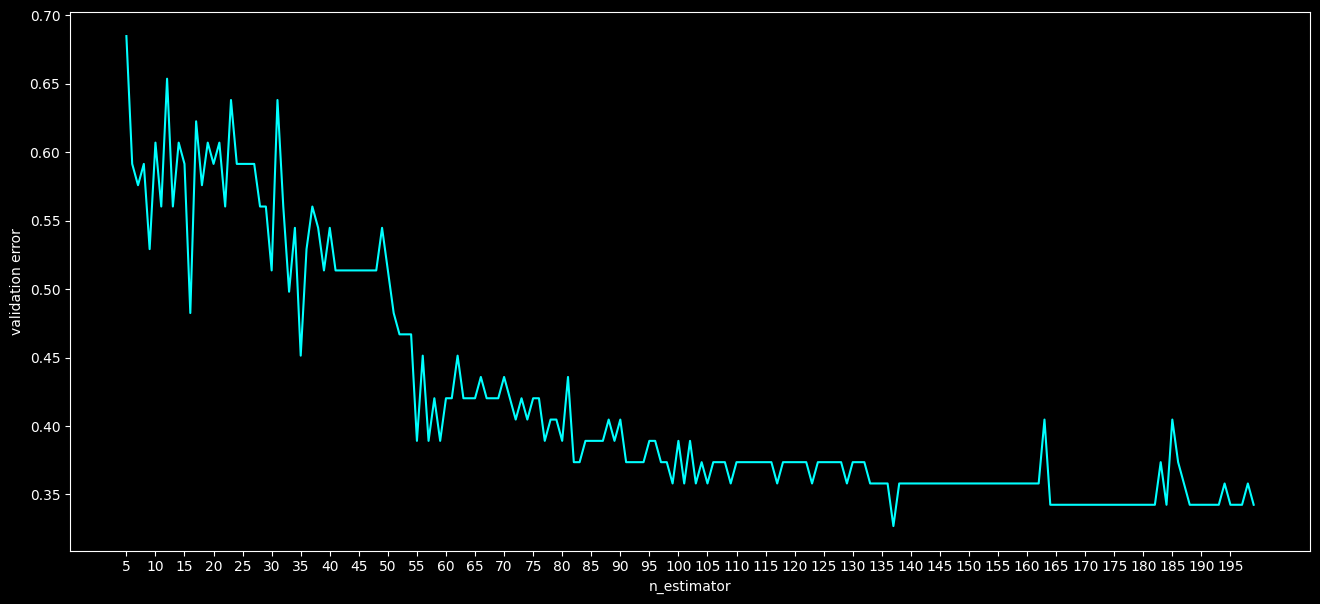

In [20]:
from sklearn.metrics import mean_squared_error
from tqdm import tqdm
#TODO : Calculate validation error for different number of estimators 
#TODO : Plot validation error versus number of estimators figure.
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),algorithm='SAMME',learning_rate=0.5)
errors=[]
n_estimators=np.arange(5,200)
for n_estimator in tqdm(n_estimators):
    ada.n_estimators=n_estimator
    ada.fit(X_train,y_train['target'].to_numpy())
    y_predict=ada.predict(X_test)
    errors.append(mean_squared_error(y_predict,y_test))
plot_errors(errors,n_estimators) 

In [21]:
#TODO : Print the best number for estimators and minimum value for validation error.
print(f'The best number for n_estimator is {n_estimators[np.argmin(errors)]} with validation error {np.min(errors)}')

The best number for n_estimator is 137 with validation error 0.32684824902723736


### Weighted Error (10 points)

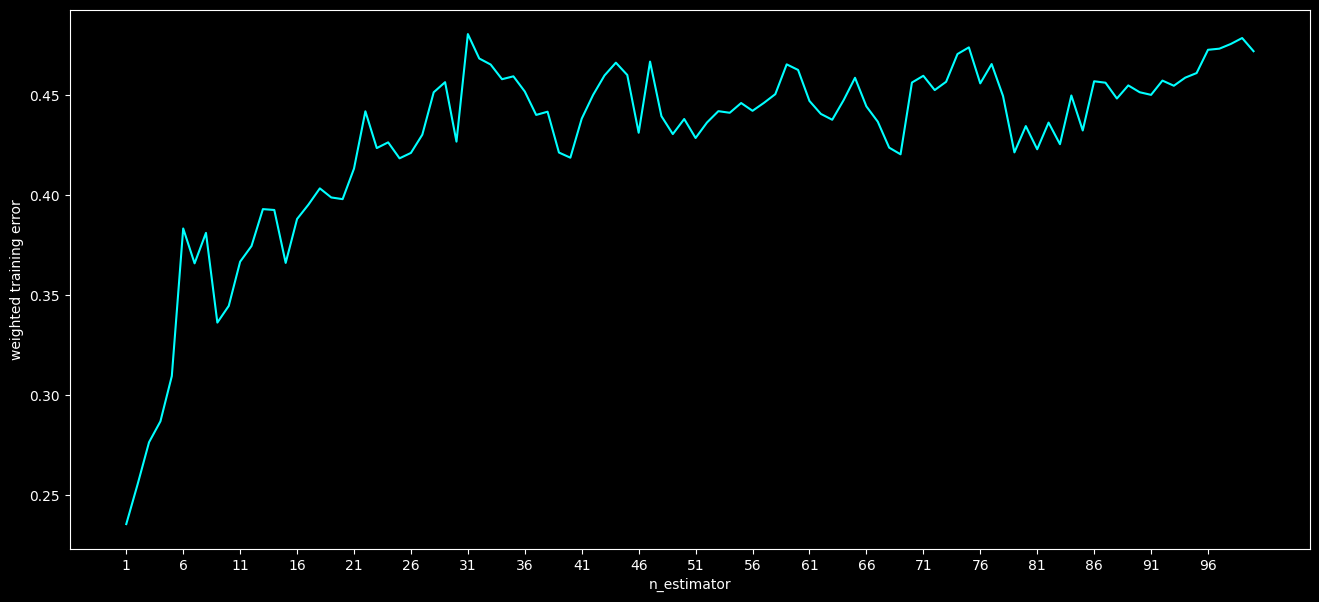

In [22]:
#TODO : Plot weighted training error versus number of estimators figure using training_errors attribute in Adaboost class.
plot_errors(adaboost.training_errors,np.arange(1,101),ylabel='weighted training error')

### Question : Why does the weighted error tend to increase as the number of estimators increase? (5points)

Because the weights of the misclassified samples increase at each iteration and the weights of correctly classified samples decrease and when trying to fit some samples using week learners they keep being predicted misclassified repeatedly and so their weights increase a lot resulting in the overall trend of the training error.